# 02 Using Inputs

This notebook demonstrates how to change a parameter value across the battery pack by using inputs

In [12]:
try:
    import liionpack as lp
except:
    !pip install -q git+https://github.com/pybamm-team/liionpack.git@main
    import liionpack as lp
import pybamm
import numpy as np

In [13]:
I_mag = 5.0
OCV_init = 4.0  # used for intial guess
Ri_init = 5e-2  # used for intial guess
R_busbar = 1.5e-6  # very small to simulate evenly distributed currents
R_connection = 1e-2
Np = 4
Ns = 1
Nbatt = Np * Ns
netlist = lp.setup_circuit(
    Np=Np, Ns=Ns, Rb=R_busbar, Rc=R_connection, Ri=Ri_init, V=OCV_init, I=I_mag
)

In [14]:
experiment = pybamm.Experiment(
    ["Discharge at 5 A for 30 minutes", "Rest for 15 minutes"],
    period="10 seconds",
)

In [15]:
parameter_values = pybamm.ParameterValues("Chen2020")

Everything up to now has been standard but if we want to change a parameter we need to update the parameter_values dictionary. Let's use particle radius as an example:

In [16]:
parameter_values.search("radius")

Negative particle radius [m]	5.86e-06
Positive particle radius [m]	5.22e-06


Change the parameter in the same way as you would with PyBaMM

In [17]:
parameter_values.update({"Negative particle radius [m]": "[input]"})

In [18]:
parameter_values["Negative particle radius [m]"]

InputParameter(-0x5df7aace624e3de5, Negative particle radius [m], children=[], domain=[], auxiliary_domains={})

With very small busbar resistance all the cells should experience very similar currents and with the same input the solutions should all look very similar too.

Define the input as a dictionary to pass to the solver with a value that is an array with the an element for each battery

In [19]:
inputs = {"Negative particle radius [m]": np.ones(4) * 6e-6}

Stepping simulation: 100%|██████████████████████████████████████████████████████████| 271/271 [00:02<00:00, 104.92it/s]


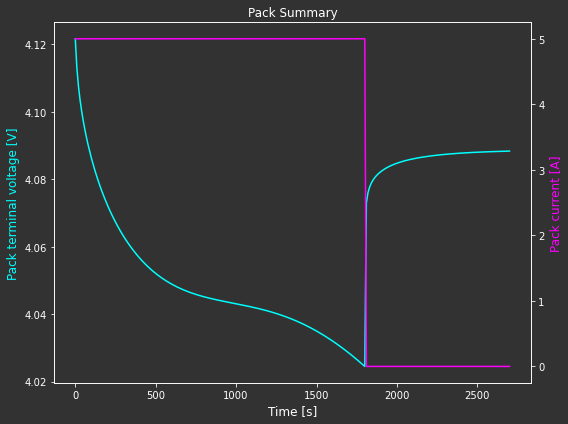

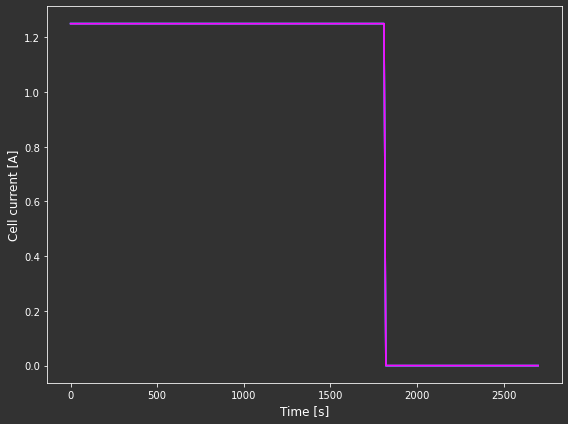

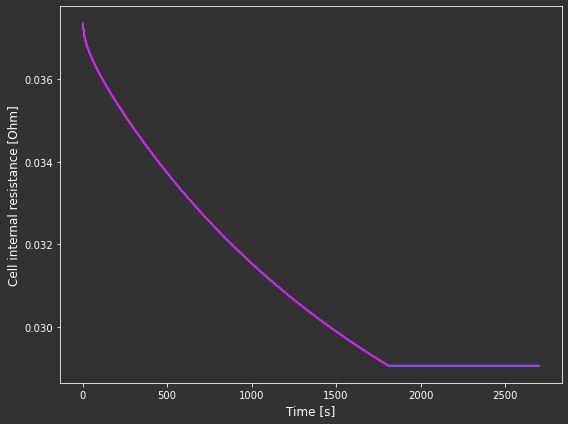

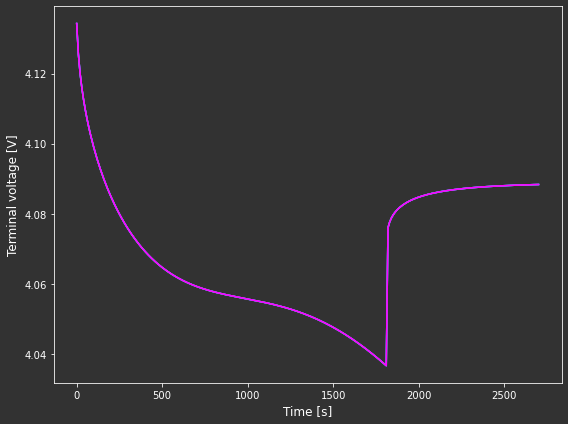

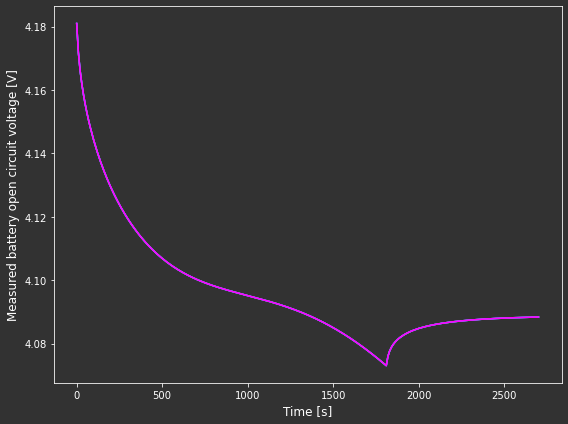

In [20]:
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    inputs=inputs,
)
lp.plot_output(output)

Now if we change the input let's see what happens

In [21]:
inputs = {"Negative particle radius [m]": np.linspace(0.5, 1.5, 4) * 6e-6}

Stepping simulation: 100%|██████████████████████████████████████████████████████████| 271/271 [00:02<00:00, 104.95it/s]


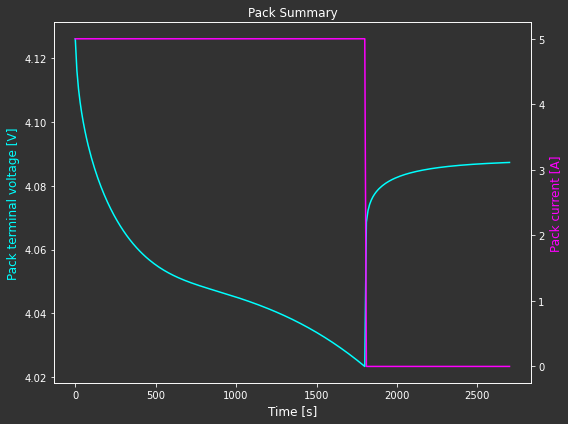

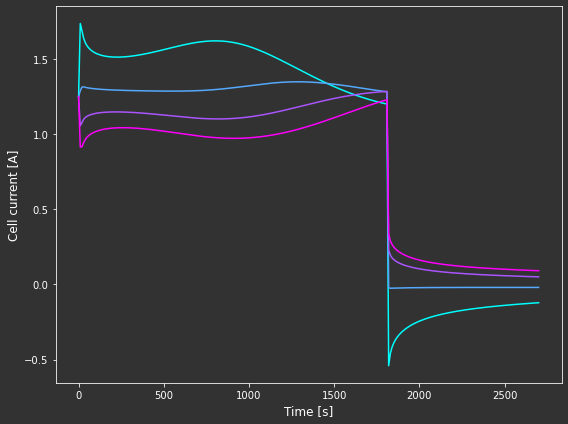

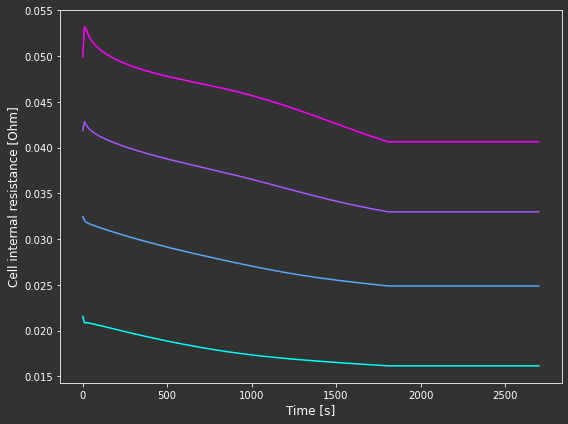

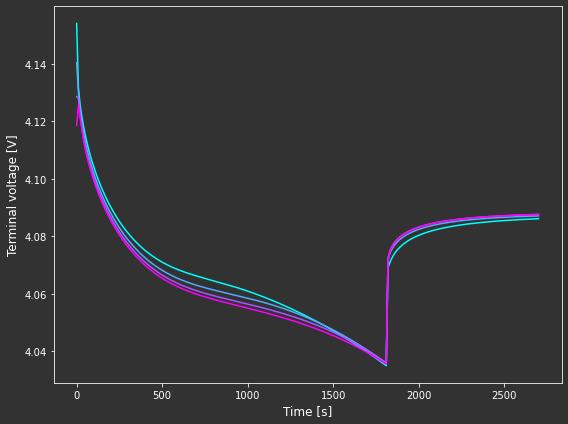

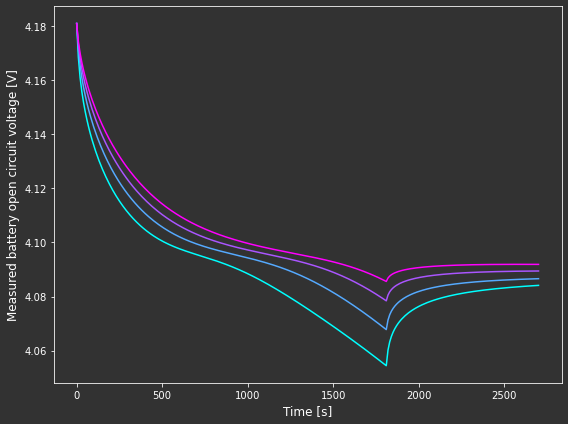

In [22]:
output = lp.solve(
    netlist=netlist,
    parameter_values=parameter_values,
    experiment=experiment,
    inputs=inputs,
)
lp.plot_output(output)